# EN3150 Assignment 03: Simple Convolutional Neural Network to Perform Classification

**Team Pixels**
* 200201V - GUNAWARDENA M.N.
* 200232P - INDRAPALA S.A.
* 200462U - PERERA N.W.P.R.A.
* 200740V - YALEGAMA M.M.O.A.B. 

## Part 1: CNN for Image Classification

**1. Why CNNs preferable for image classification over multilayered perceptrons (MLPs) or simple feedforward neural networks (NNs)?**

* MLPs lack spatial understanding, do not capture local patterns and cannot recognize patterns regardless of their position.
* CNNs preserve the spatial structure of data unlike MLPs.
* CNNs are translation invariant and can recognize patterns regardless of their position.
* CNNs have heirachical feature extraction which is well suited for capturing complex patterns in data.

**2. Set up your environment**

In [1]:
! pip install graphviz
! pip install pydot
! pip install visualkeras

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import keras
import IPython

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from keras.losses import sparse_categorical_crossentropy
from keras.optimizers import Adam

import visualkeras
from keras.utils import plot_model
from IPython.display import display, Image

  Obtaining dependency information for aggdraw>=1.3.11 from https://files.pythonhosted.org/packages/da/05/8912c901a3965ec7117d6cc33eaec3888c717611f72ce69d8be62a01d149/aggdraw-1.3.18-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 15.3 MB/s eta 0:00:00


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


**3. Prepare your dataset: Download the CIFAR-10 dataset. This dataset contains 60,000 color images in 10 different classes. Further, apply suitable feature scaling.**

**4. Split the dataset into training, validation, and testing subsets using a ratio of 60% for training and 20% each for validation and testing sets.**

170498071/170498071 [==============================] - 5s 0us/step


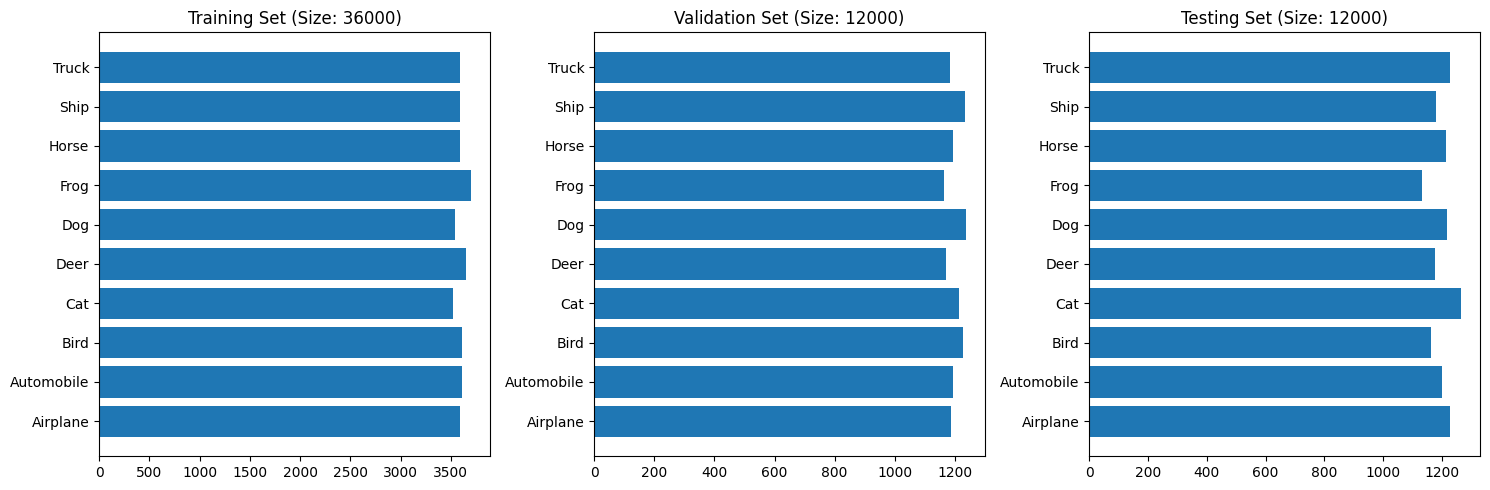


Visualize 100 random images along with their labels from the training set


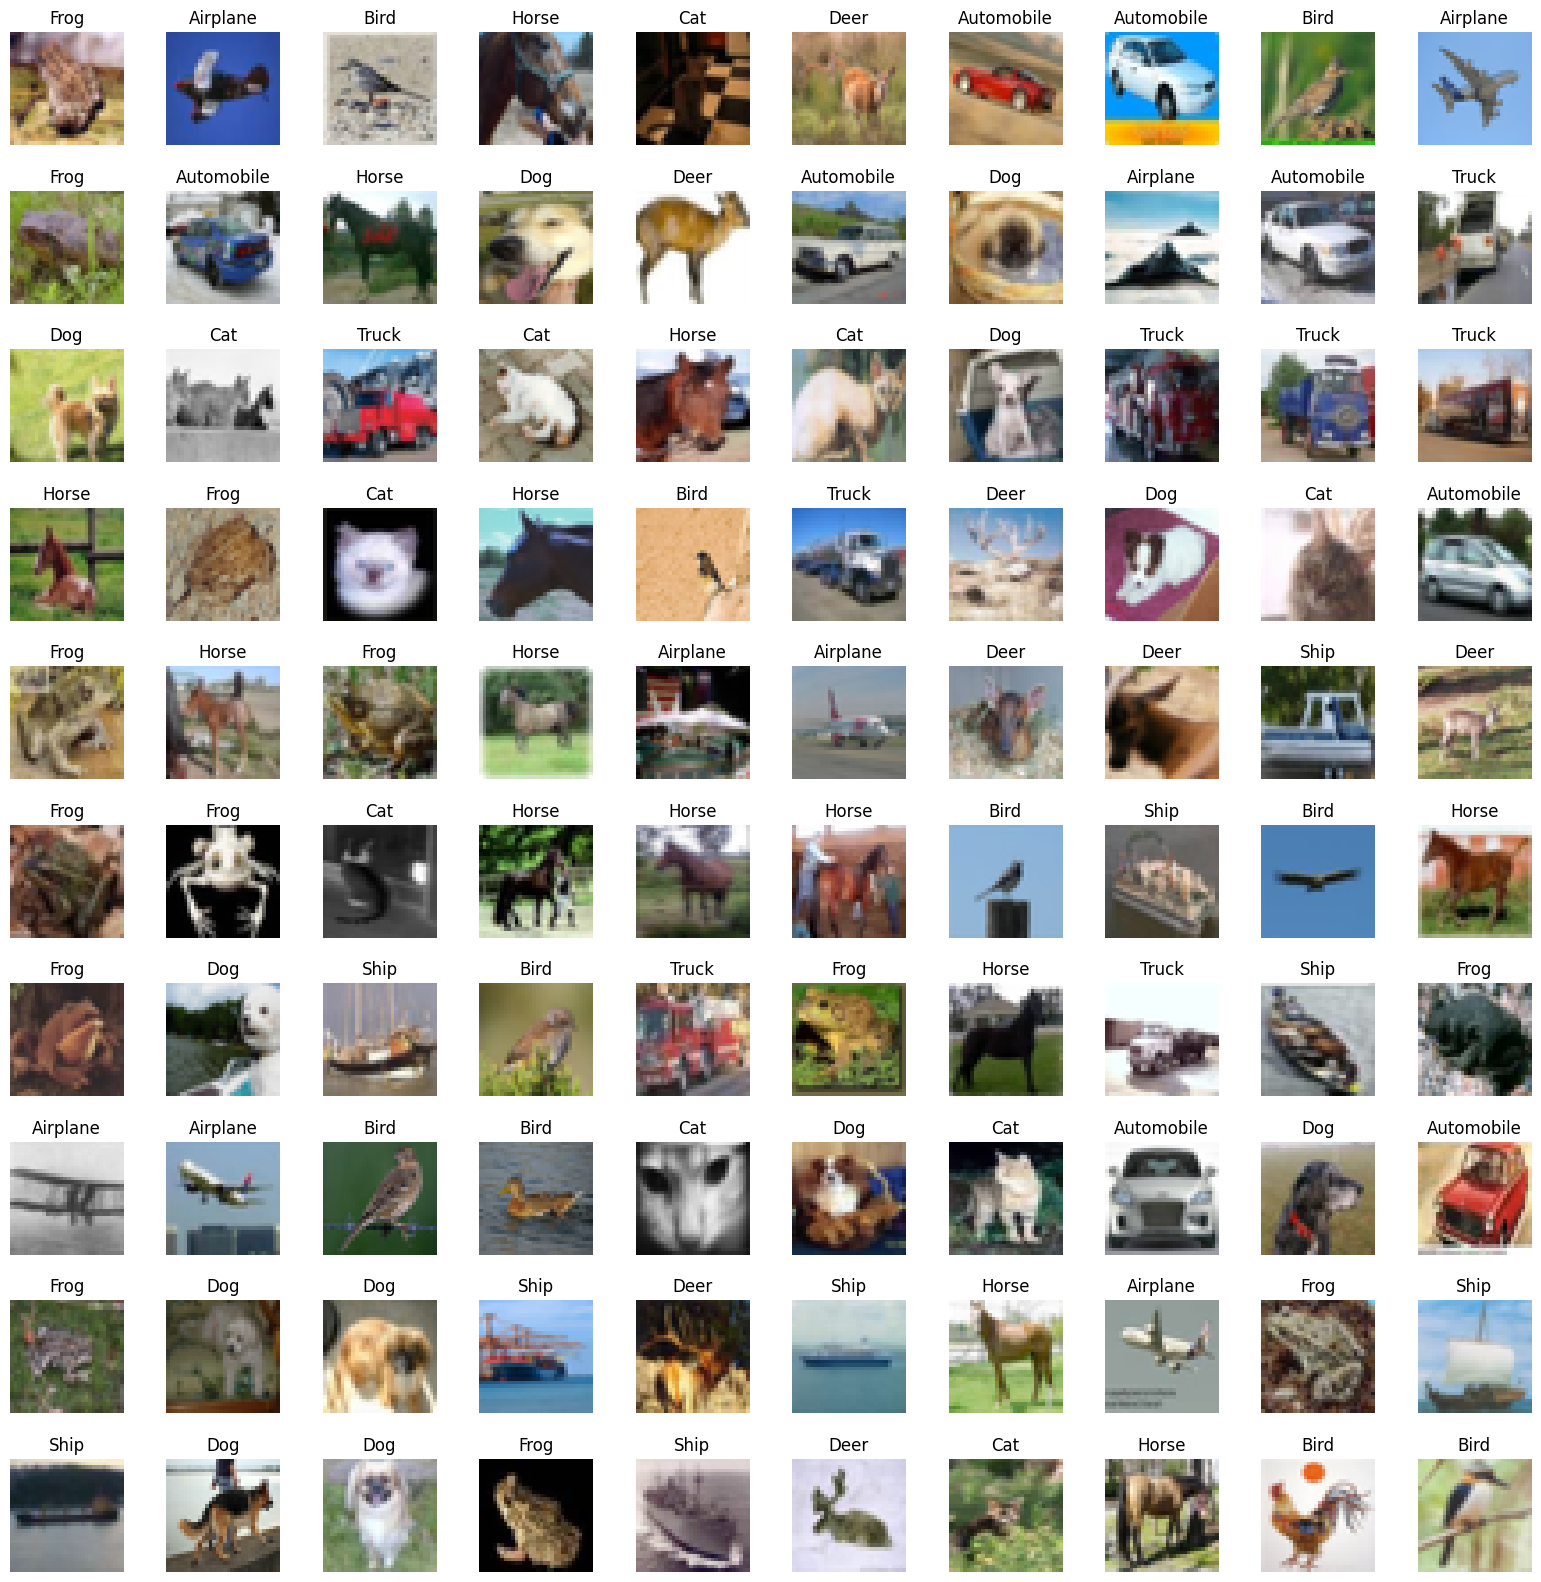

In [2]:
# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Combine the training and testing set
dataset_images = np.concatenate((X_train,X_test),axis=0)
dataset_labels = np.concatenate((y_train,y_test),axis=0)

# Split the dataset into training, validation, and testing sets
Train_Images,Temp_Images,Train_Labels,Temp_Labels = train_test_split(dataset_images,dataset_labels,test_size=0.4,random_state=42)
Validation_Images,Test_Images,Validation_Labels,Test_Labels = train_test_split(Temp_Images,Temp_Labels,test_size=0.5,random_state=42)

# Class names for CIFAR-10
classes_name = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Function to plot class distribution
def plot_class_distribution(images,labels,title,subset_size):
    classes, counts = np.unique(labels,return_counts=True)
    plt.barh(classes_name,counts)
    plt.title(f'{title} (Size: {subset_size})')

# Create a 1x3 subplot for training, validation, and testing sets
plt.figure(figsize=(15, 5))

# Plotting training set
plt.subplot(1,3,1)
plot_class_distribution(Train_Images,Train_Labels,'Training Set',len(Train_Images))

# Plotting validation set
plt.subplot(1,3,2)
plot_class_distribution(Validation_Images,Validation_Labels,'Validation Set',len(Validation_Images))

# Plotting testing set
plt.subplot(1,3,3)
plot_class_distribution(Test_Images,Test_Labels,'Testing Set',len(Test_Images))

# Adjust layout
plt.tight_layout()
plt.show()

# Function to visualize random images
def visualize_random_images(images,labels,num_images=100):
    plt.figure(figsize=(20,20))
    indices = np.random.choice(len(images),num_images,replace=False)
    for i,idx in enumerate(indices,1):
        plt.subplot(10,10,i)
        plt.imshow(images[idx])
        plt.title(classes_name[labels[idx][0]],fontsize=12)
        plt.axis('off')
    plt.subplots_adjust(hspace=0.4,wspace=0.1)
    plt.show()

# Visualize 100 random images with labels from the training subset
print()
print('Visualize 100 random images along with their labels from the training set')
visualize_random_images(Train_Images,Train_Labels)

# Data Preprocessing
Train_Images      = Train_Images.astype('float32')/255
Validation_Images = Validation_Images.astype('float32')/255
Test_Images       = Test_Images.astype('float32')/255

**5. Build the CNN model**

A basic CNN architecture is given below. Feel free to modify this network by adding
more layers.
* A Convolutional layer with x1 filters, a m1 ×m1 kernel, and ’relu’ activation.
* A MaxPooling layer.
* Another Convolutional layer with x2 filters, a m2 ×m2 kernel, and ’relu’ activation.
* Another MaxPooling layer.
* Flatten the output.
* A fully connected layer with x3 units and ’relu’ activation.
* Add dropout with a rate of d to reduce overfitting.
* An output layer with 10 units (for 10 classes) and ’softmax’ activation.

**6. Determine the parameters of the above network such as kernel sizes, filter sizes, size of the fully connected layer and dropout rate.**

The architecture we used is as follows. It is a variation of the above mentioned architecture with many more layers.

1. Convolutional Layer (1):

* Type: Conv2D
* Number of Filters: 32
* Kernel Size: (3, 3)
* Activation Function: ReLU
* Padding: 'same'
* Input Shape: (32, 32, 3)
* Batch Normalization follows the Conv2D layer.

2. Convolutional Layer (2):

* Type: Conv2D
* Number of Filters: 32
* Kernel Size: (3, 3)
* Activation Function: ReLU
* Padding: 'same'
* Batch Normalization follows the Conv2D layer.

3. Pooling Layer (1):

* Type: MaxPooling2D
* Pool Size: (2, 2)

4. Dropout Layer (1):

* Type: Dropout
* Dropout Rate: 0.25

5. Convolutional Layer (3):

* Type: Conv2D
* Number of Filters: 64
* Kernel Size: (3, 3)
* Activation Function: ReLU
* Padding: 'same'
* Batch Normalization follows the Conv2D layer.

6. Convolutional Layer (4):

* Type: Conv2D
* Number of Filters: 64
* Kernel Size: (3, 3)
* Activation Function: ReLU
* Padding: 'same'
* Batch Normalization follows the Conv2D layer.

7. Pooling Layer (2):

* Type: MaxPooling2D
* Pool Size: (2, 2)

8. Dropout Layer (2):

* Type: Dropout
* Dropout Rate: 0.25

9. Convolutional Layer (5):

* Type: Conv2D
* Number of Filters: 128
* Kernel Size: (3, 3)
* Activation Function: ReLU
* Padding: 'same'
* Batch Normalization follows the Conv2D layer.

10. Convolutional Layer (6):

* Type: Conv2D
* Number of Filters: 128
* Kernel Size: (3, 3)
* Activation Function: ReLU
* Padding: 'same'
* Batch Normalization follows the Conv2D layer.

11. Pooling Layer (3):

* Type: MaxPooling2D
* Pool Size: (2, 2)

12. Dropout Layer (3):

* Type: Dropout
* Dropout Rate: 0.25

13. Flatten Layer:

* Type: Flatten

14. Fully Connected Layer (Dense Layer):

* Type: Dense
* Number of Units: 128
* Activation Function: ReLU

15. Dropout Layer (4):

* Type: Dropout
* Dropout Rate: 0.25

16. Output Layer (Dense Layer):

* Type: Dense
* Number of Units: 10 (for 10 classes)
* Activation Function: Softmax


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv_1 (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 Batch_Norm_1 (BatchNormali  (None, 32, 32, 32)        128       
 zation)                                                         
                                                                 
 Conv_2 (Conv2D)             (None, 32, 32, 32)        9248      
                                                                 
 Batch_Norm_2 (BatchNormali  (None, 32, 32, 32)        128       
 zation)                                                         
                                                                 
 Max_Pool_1 (MaxPooling2D)   (None, 16, 16, 32)        0         
                                                                 
 Dropout_1 (Dropout)         (None, 16, 16, 32)        0

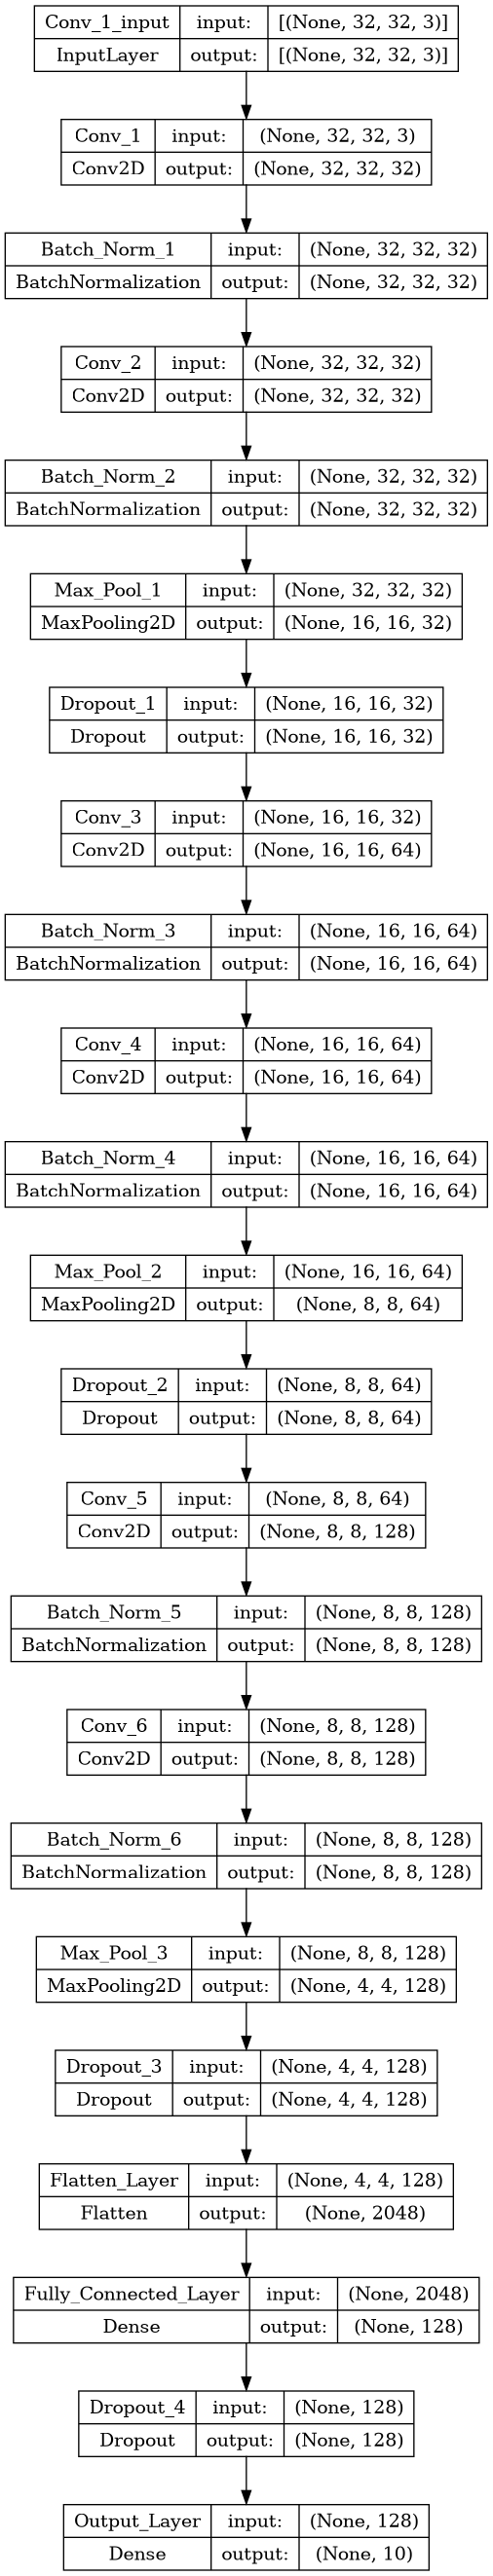

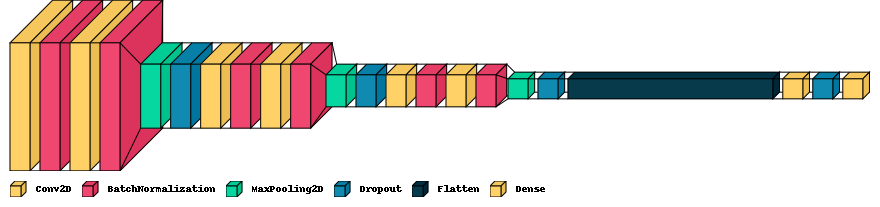

In [3]:
def create_model(lr):    
    INPUT_SHAPE = (32, 32, 3)
    KERNEL_SIZE = (3, 3)
    model = Sequential()

    # Convolutional Layer
    model.add(Conv2D(filters=32, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same', name='Conv_1'))
    model.add(BatchNormalization(name='Batch_Norm_1'))

    # Convolutional Layer
    model.add(Conv2D(filters=32, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same', name='Conv_2'))
    model.add(BatchNormalization(name='Batch_Norm_2'))

    # Pooling layer
    model.add(MaxPool2D(pool_size=(2, 2), name='Max_Pool_1'))

    # Dropout layers
    model.add(Dropout(0.25, name='Dropout_1'))

    # Convolutional Layer
    model.add(Conv2D(filters=64, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same', name='Conv_3'))
    model.add(BatchNormalization(name='Batch_Norm_3'))

    # Convolutional Layer
    model.add(Conv2D(filters=64, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same', name='Conv_4'))
    model.add(BatchNormalization(name='Batch_Norm_4'))

    # Pooling layer
    model.add(MaxPool2D(pool_size=(2, 2), name='Max_Pool_2'))

    # Dropout layers
    model.add(Dropout(0.25, name='Dropout_2'))

    # Convolutional Layer
    model.add(Conv2D(filters=128, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same', name='Conv_5'))
    model.add(BatchNormalization(name='Batch_Norm_5'))

    # Convolutional Layer
    model.add(Conv2D(filters=128, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same', name='Conv_6'))
    model.add(BatchNormalization(name='Batch_Norm_6'))

    # Pooling layer
    model.add(MaxPool2D(pool_size=(2, 2), name='Max_Pool_3'))

    # Dropout layers
    model.add(Dropout(0.25, name='Dropout_3'))

    # Flatten
    model.add(Flatten(name='Flatten_Layer'))

    # A fully connected layer with ’relu’ activation
    model.add(Dense(128, activation='relu', name='Fully_Connected_Layer'))

    # Add dropout with a rate of d to reduce overfitting.
    model.add(Dropout(0.25, name='Dropout_4'))

    # An output layer with 10 units (for 10 classes) and ’softmax’ activation.
    model.add(Dense(10, activation='softmax', name='Output_Layer'))

    model.compile(loss=sparse_categorical_crossentropy,optimizer=Adam(learning_rate=lr),metrics='accuracy')
    return model


# Let learning rate = 0.001
temp_model = create_model(0.001)
temp_model.summary()

# Visualize the Model
print()
print()
plot_model(temp_model,show_shapes=True,to_file='model.png')
display(Image(filename='/kaggle/working/model.png'))
print()
print()
visualkeras.layered_view(temp_model,legend=True)

**7. Train the model: Train the model using the training data for 20 epochs and plot training and validation loss for with respect to epoch. Here, for the optimizer you may use adam and sparse categorical crossentropy as the loss function. Set a suitable learning rate.**

Epoch 1/20


2023-12-01 17:50:07.569062: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/Dropout_1/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


71/71 [==============================] - 18s 60ms/step - loss: 1.9883 - accuracy: 0.3279 - val_loss: 2.6892 - val_accuracy: 0.1165
Epoch 2/20
71/71 [==============================] - 3s 42ms/step - loss: 1.4893 - accuracy: 0.4606 - val_loss: 4.2017 - val_accuracy: 0.1220
Epoch 3/20
71/71 [==============================] - 3s 42ms/step - loss: 1.3184 - accuracy: 0.5252 - val_loss: 3.6940 - val_accuracy: 0.1376
Epoch 4/20
71/71 [==============================] - 3s 42ms/step - loss: 1.1947 - accuracy: 0.5714 - val_loss: 2.6875 - val_accuracy: 0.2082
Epoch 5/20
71/71 [==============================] - 3s 42ms/step - loss: 1.0882 - accuracy: 0.6131 - val_loss: 3.2276 - val_accuracy: 0.1742
Epoch 6/20
71/71 [==============================] - 3s 42ms/step - loss: 1.0127 - accuracy: 0.6396 - val_loss: 2.5834 - val_accuracy: 0.2992
Epoch 7/20
71/71 [==============================] - 3s 42ms/step - loss: 0.9380 - accuracy: 0.6691 - val_loss: 1.5991 - val_accuracy: 0.4442
Epoch 8/20
71/71 [=====

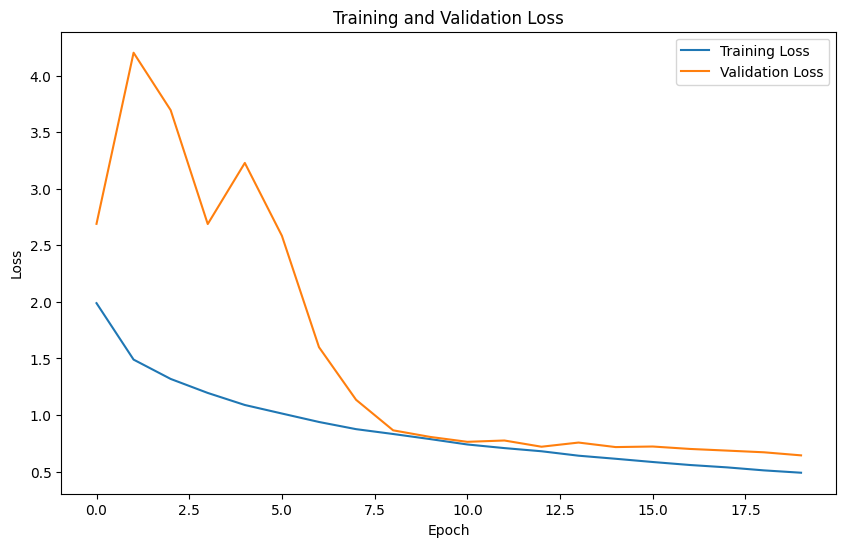

In [4]:
model_history = temp_model.fit(Train_Images,Train_Labels,batch_size=512,epochs=20,validation_data=(Validation_Images,Validation_Labels))

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(model_history.history['loss'],label='Training Loss')
plt.plot(model_history.history['val_loss'],label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

**8. Why we have chosen adam optimizer over SGD?**

* ***Adaptive Learning Rates:*** Adam dynamically adjusts the learning rates for each parameter during training. It maintains separate learning rates for each parameter, and these rates are updated based on the historical gradients. This adaptability can lead to faster convergence and better performance compared to SGD, which uses a fixed learning rate.

* ***Momentum***: Adam incorporates the concept of momentum, similar to SGD with momentum. Momentum helps accelerate the optimization process, especially in the presence of noisy gradients or sparse data. It allows the optimizer to keep moving in the right direction, even when gradients are noisy or have varying magnitudes.

* ***Reduced Sensitivity to Hyperparameters:*** Adam is less sensitive to the choice of learning rate hyperparameter compared to SGD. While SGD often requires careful tuning of the learning rate, Adam is more forgiving and tends to work well with default hyperparameters.

**9. Why we have chosen sparse categorical crossentropy as the loss function?**

* In the CIFAR-10 dataset, each image is associated with a class label represented as an integer (e.g., 0 for 'Airplane', 1 for 'Automobile', and so on). The labels are not one-hot encoded; they are single integers indicating the class of the respective image.

* The loss function 'sparse_categorical_crossentropy' is designed for classification problems where the labels are integers. It internally performs the conversion from integer labels to one-hot encoded vectors, making it convenient when your labels are integers instead of one-hot encoded arrays.

* If we used 'categorical_crossentropy' instead, we would need to one-hot encode our labels explicitly using to_categorical, as the function expects one-hot encoded labels.

**10. Evaluate the Model: After training, evaluate the model’s performance on the testing dataset. Record the train/test accuracy, confusion matrix, precision and recall.**

1125/1125 - 3s - loss: 0.2722 - accuracy: 0.9093 - 3s/epoch - 3ms/step
Train Accuracy: 90.93%
Train Loss: 0.2722

375/375 - 1s - loss: 0.6414 - accuracy: 0.7859 - 998ms/epoch - 3ms/step
Test Accuracy: 78.59%
Test Loss: 0.6414

375/375 [==============================] - 1s 2ms/step
Classification Report:
               precision    recall  f1-score   support

    Airplane       0.81      0.82      0.82      1226
  Automobile       0.88      0.90      0.89      1200
        Bird       0.72      0.67      0.69      1161
         Cat       0.61      0.62      0.61      1266
        Deer       0.82      0.71      0.76      1176
         Dog       0.64      0.72      0.68      1217
        Frog       0.85      0.83      0.84      1133
       Horse       0.83      0.81      0.82      1215
        Ship       0.86      0.92      0.89      1178
       Truck       0.86      0.89      0.87      1228

    accuracy                           0.79     12000
   macro avg       0.79      0.79      0.79 

<Figure size 2500x2500 with 0 Axes>

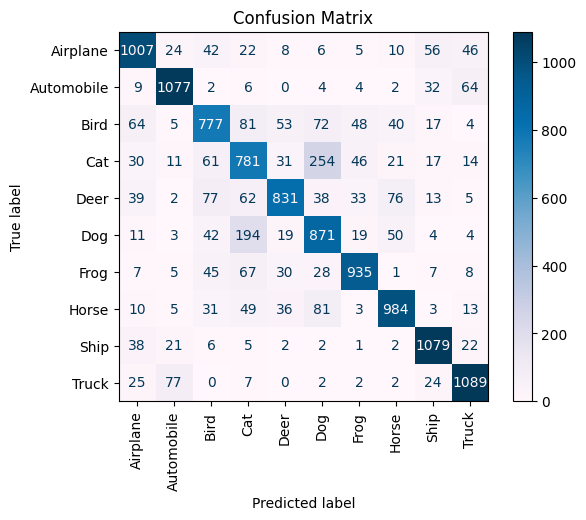

In [5]:
# Evaluate the model on the training set
train_loss, train_accuracy = temp_model.evaluate(Train_Images, Train_Labels, verbose=2)
print(f'Train Accuracy: {train_accuracy*100:.2f}%')
print(f'Train Loss: {train_loss:.4f}')
print()

# Evaluate the model on the testing set
test_loss, test_accuracy = temp_model.evaluate(Test_Images, Test_Labels, verbose=2)
print(f'Test Accuracy: {test_accuracy*100:.2f}%')
print(f'Test Loss: {test_loss:.4f}')
print()

# Predictions on the testing set
y_pred = temp_model.predict(Test_Images)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert one-hot encoded labels to actual labels
y_true_classes = np.squeeze(Test_Labels)

# Confusion Matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Classification Report
class_report = classification_report(y_true_classes, y_pred_classes, target_names=classes_name)
print('Classification Report:\n', class_report)
print()

# Plot Confusion Matrix
plt.figure(figsize=(25,25))
ConfusionMatrixDisplay(conf_matrix, display_labels=classes_name).plot(cmap='PuBu',values_format='d')
plt.title('Confusion Matrix')
plt.xticks(rotation='vertical')
plt.show()

**11. Plot training and validation loss for with respect to epoch for different learning rates such as 0.0001, 0.001, 0.01, and 0.1.**

Epoch 1/20


2023-12-01 17:51:45.217192: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/Dropout_1/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


71/71 [==============================] - 8s 52ms/step - loss: 2.5564 - accuracy: 0.2111 - val_loss: 2.4582 - val_accuracy: 0.1558
Epoch 2/20
71/71 [==============================] - 3s 42ms/step - loss: 1.9296 - accuracy: 0.2934 - val_loss: 2.9954 - val_accuracy: 0.1922
Epoch 3/20
71/71 [==============================] - 3s 42ms/step - loss: 1.7973 - accuracy: 0.3428 - val_loss: 3.3243 - val_accuracy: 0.2017
Epoch 4/20
71/71 [==============================] - 3s 42ms/step - loss: 1.7074 - accuracy: 0.3758 - val_loss: 3.3387 - val_accuracy: 0.2121
Epoch 5/20
71/71 [==============================] - 3s 42ms/step - loss: 1.6339 - accuracy: 0.4035 - val_loss: 2.9285 - val_accuracy: 0.2263
Epoch 6/20
71/71 [==============================] - 3s 42ms/step - loss: 1.5800 - accuracy: 0.4232 - val_loss: 2.4872 - val_accuracy: 0.2438
Epoch 7/20
71/71 [==============================] - 3s 42ms/step - loss: 1.5279 - accuracy: 0.4440 - val_loss: 1.8933 - val_accuracy: 0.3469
Epoch 8/20
71/71 [======

2023-12-01 17:52:51.966792: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_2/Dropout_1/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


71/71 [==============================] - 9s 52ms/step - loss: 1.9855 - accuracy: 0.3322 - val_loss: 2.5170 - val_accuracy: 0.1555
Epoch 2/20
71/71 [==============================] - 3s 42ms/step - loss: 1.5060 - accuracy: 0.4506 - val_loss: 2.6450 - val_accuracy: 0.1602
Epoch 3/20
71/71 [==============================] - 3s 42ms/step - loss: 1.3320 - accuracy: 0.5196 - val_loss: 2.8208 - val_accuracy: 0.1761
Epoch 4/20
71/71 [==============================] - 3s 43ms/step - loss: 1.2176 - accuracy: 0.5640 - val_loss: 2.8090 - val_accuracy: 0.1812
Epoch 5/20
71/71 [==============================] - 3s 43ms/step - loss: 1.1073 - accuracy: 0.6052 - val_loss: 3.2150 - val_accuracy: 0.2488
Epoch 6/20
71/71 [==============================] - 3s 42ms/step - loss: 1.0318 - accuracy: 0.6334 - val_loss: 2.4172 - val_accuracy: 0.2872
Epoch 7/20
71/71 [==============================] - 3s 42ms/step - loss: 0.9493 - accuracy: 0.6653 - val_loss: 1.5672 - val_accuracy: 0.4711
Epoch 8/20
71/71 [======

2023-12-01 17:54:18.089893: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_3/Dropout_1/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


71/71 [==============================] - 9s 52ms/step - loss: 2.9293 - accuracy: 0.2235 - val_loss: 3.5293 - val_accuracy: 0.1206
Epoch 2/20
71/71 [==============================] - 3s 42ms/step - loss: 1.8566 - accuracy: 0.2993 - val_loss: 3.1180 - val_accuracy: 0.1517
Epoch 3/20
71/71 [==============================] - 3s 42ms/step - loss: 1.7584 - accuracy: 0.3339 - val_loss: 2.4975 - val_accuracy: 0.2089
Epoch 4/20
71/71 [==============================] - 3s 42ms/step - loss: 1.6864 - accuracy: 0.3666 - val_loss: 1.9979 - val_accuracy: 0.2959
Epoch 5/20
71/71 [==============================] - 3s 42ms/step - loss: 1.6103 - accuracy: 0.3954 - val_loss: 1.8428 - val_accuracy: 0.3467
Epoch 6/20
71/71 [==============================] - 3s 42ms/step - loss: 1.5316 - accuracy: 0.4265 - val_loss: 1.4916 - val_accuracy: 0.4512
Epoch 7/20
71/71 [==============================] - 3s 42ms/step - loss: 1.4629 - accuracy: 0.4606 - val_loss: 1.7942 - val_accuracy: 0.3957
Epoch 8/20
71/71 [======

2023-12-01 17:55:25.014691: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_4/Dropout_1/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


71/71 [==============================] - 8s 51ms/step - loss: 15.8510 - accuracy: 0.1017 - val_loss: 149.7004 - val_accuracy: 0.0970
Epoch 2/20
71/71 [==============================] - 3s 42ms/step - loss: 2.3040 - accuracy: 0.0994 - val_loss: 2.3060 - val_accuracy: 0.0988
Epoch 3/20
71/71 [==============================] - 3s 42ms/step - loss: 2.3040 - accuracy: 0.1010 - val_loss: 2.3048 - val_accuracy: 0.0968
Epoch 4/20
71/71 [==============================] - 3s 42ms/step - loss: 2.3049 - accuracy: 0.1011 - val_loss: 2.3041 - val_accuracy: 0.0988
Epoch 5/20
71/71 [==============================] - 3s 42ms/step - loss: 2.3046 - accuracy: 0.1014 - val_loss: 2.3066 - val_accuracy: 0.1022
Epoch 6/20
71/71 [==============================] - 3s 42ms/step - loss: 2.3057 - accuracy: 0.0983 - val_loss: 2.3039 - val_accuracy: 0.0993
Epoch 7/20
71/71 [==============================] - 3s 42ms/step - loss: 2.3049 - accuracy: 0.1005 - val_loss: 2.3034 - val_accuracy: 0.1029
Epoch 8/20
71/71 [===

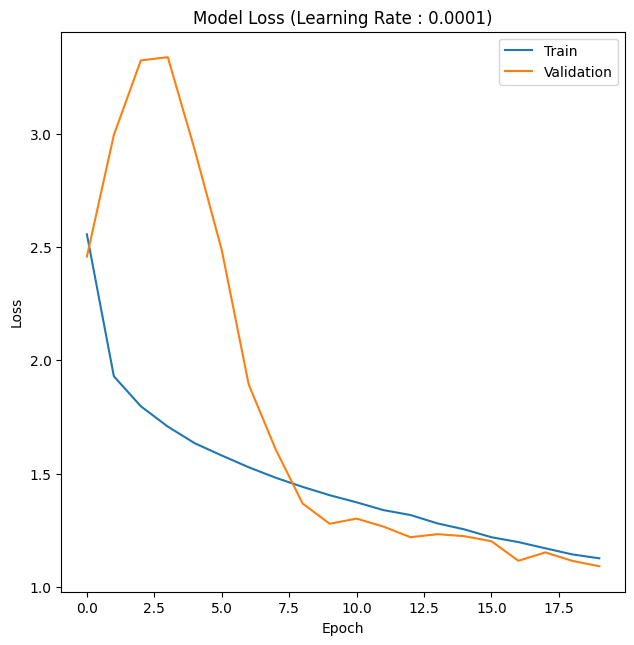

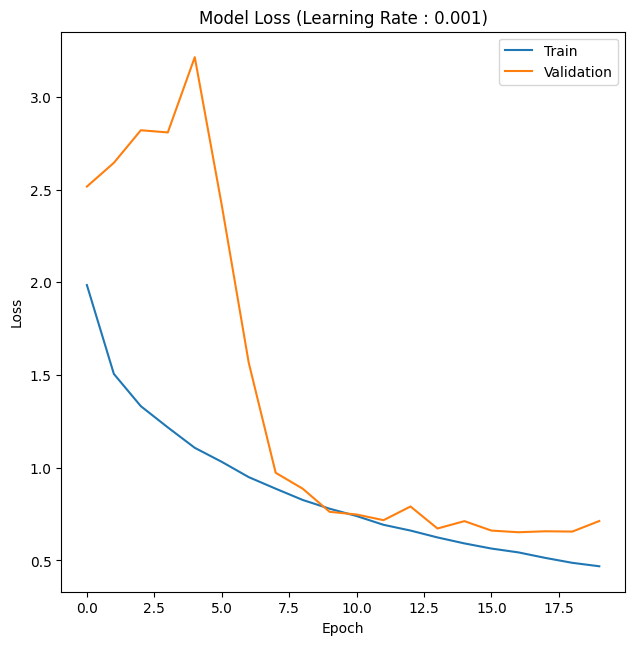

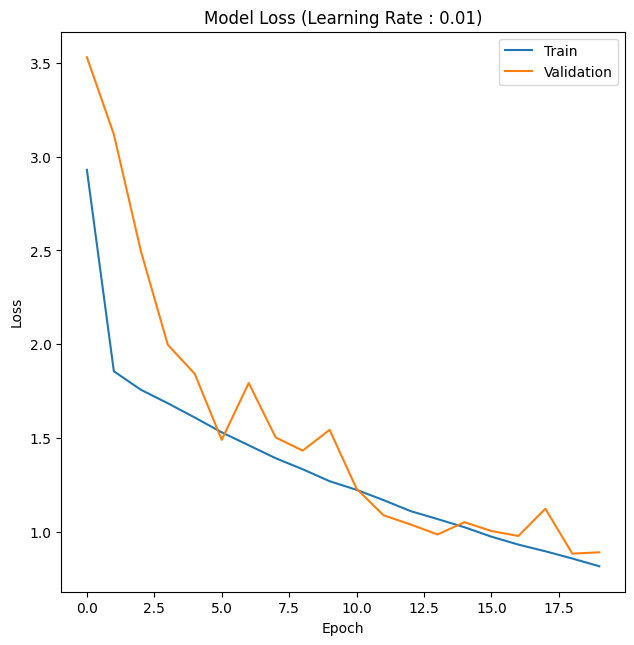

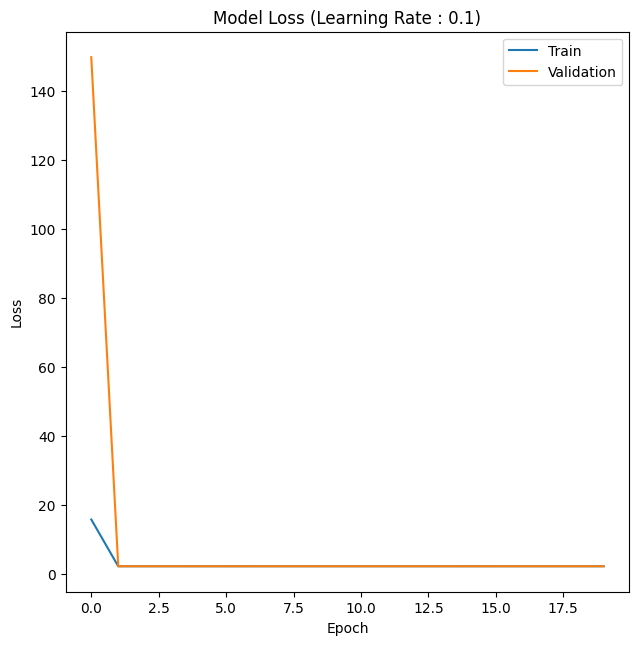

In [6]:
learning_rates = [0.0001, 0.001, 0.01, 0.1]

for i in range(len(learning_rates)):
    temp_model    = create_model(learning_rates[i])
    model_history = temp_model.fit(Train_Images,Train_Labels,batch_size=512,epochs=20,validation_data=(Validation_Images,Validation_Labels))
    plt.figure(figsize =(16,16))
    plt.subplot(2,2,i+1)
    plt.plot(model_history.history['loss'])
    plt.plot(model_history.history['val_loss'])
    plt.title(f'Model Loss (Learning Rate : {learning_rates[i]})')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend (['Train','Validation'],loc='upper right')
plt.show ()

## Part 2: Comparing our Network with State-of-the-art Networks